In [471]:
#!pip install seaborn-qqplot

#Set System Options
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import warnings
warnings.filterwarnings('ignore')

#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn_qqplot import qqplot
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import boxcox1p

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import SGDRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge

from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 2915)
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:.0f}'.format


In [412]:
#Read the housing train dataset and explore
train = pd.read_csv("C:/Users/Vanessa/Queens - MMA/MMA 867 - Predictive Modelling/Assignment 1 - Individual/train.csv")
train.shape
train.dtypes
train.head(5)
train.columns

#Keep a copy of the Id column
trainID = train['Id']

#Drop the Id column because it won't be needed for building the Regression model
train.drop("Id", axis = 1, inplace = True)


(1460, 81)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL           65     8450   Pave   NaN      Reg   
1   2          20       RL           80     9600   Pave   NaN      Reg   
2   3          60       RL           68    11250   Pave   NaN      IR1   
3   4          70       RL           60     9550   Pave   NaN      IR1   
4   5          60       RL           84    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         196        Gd        TA      PConc       Gd       TA           No   
1           0        TA        TA     CBlock       Gd       TA           Gd   
2         162        Gd        TA      PConc       Gd       TA           Mn   
3           0        TA        TA     BrkTil       TA       Gd           No   
4         350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [413]:
#Read the test set
test = pd.read_csv("C:/Users/Vanessa/Queens - MMA/MMA 867 - Predictive Modelling/Assignment 1 - Individual/test.csv")
test.shape
test.head(5)
test.columns

#Keep a copy of the Id column
testID = test['Id']

#Drop the Id column because it won't be needed for building the Regression model
test.drop("Id", axis = 1, inplace = True)

(1459, 80)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH           80    11622   Pave   NaN      Reg   
1  1462          20       RL           81    14267   Pave   NaN      IR1   
2  1463          60       RL           74    13830   Pave   NaN      IR1   
3  1464          60       RL           78     9978   Pave   NaN      IR1   
4  1465         120       RL           43     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0           0        TA        TA     CBlock       TA       TA           No   
1         108        TA        TA     CBlock       TA       TA           No   
2           0        TA        TA      PConc       Gd       TA           No   
3          20        TA        TA      PConc       TA       TA           No   
4           0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec         468          LwQ         144        270          882   
1          ALQ         923          Unf           0        406         1329   
2          GLQ         791          Unf           0        137          928   
3          GLQ         602          Unf           0        324          926   
4          ALQ         263          Unf           0       1017         1280   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896             0             0         1         0             2   
1       1329             0             0         1         1             3   
2       1629             0             0         2         1             3   
3       1604             0             0         2         1             3   
4       1280             0             0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523           60       RL          130    40094   Pave   NaN      IR1   
1298          60       RL          313    63887   Pave   NaN      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
523          Bnk    AllPub    Inside       Gtl      Edwards       PosN   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
523        PosN     1Fam     2Story           10            5       2007   
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
523           2008       Hip  CompShg     CemntBd     CmentBd      Stone   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
523          762        Ex        TA      PConc       Ex       TA   
1298         796        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
523            Gd          GLQ        2260          Unf           0   
1298           Gd          GLQ        5644          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
523         878         3138    GasA        Ex          Y      SBrkr   
1298        466         6110    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
523       3138      1538             0       4676             1             0   
1298      4692       950             0       5642             2             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
523          3         1             3             1          Ex   
1298         2         1             3             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
523             11        Typ           1          Gd    BuiltIn         2007   
1298            12        Typ           3          Gd     Attchd         2008   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
523           Fin           3         884         TA         TA          Y   
1298          Fin           2        1418         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
523          208          406              0          0            0   
1298         214          292              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
523          0    NaN   NaN         NaN        0      10    2007      New   
1298       480     Gd   NaN         NaN        0       1    2008      New   

     SaleCondition  SalePrice  
523        Partial     184750  
1298       Partial     160000

(1458, 80)

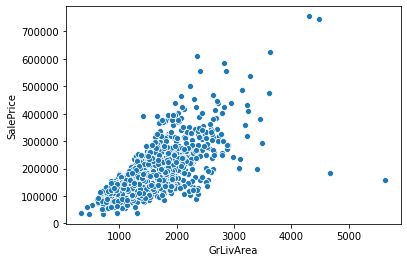

In [414]:
#Remove outliers

#Scatterplot of 'GrLivArea' against 'SalePrice'
sns.scatterplot(x="GrLivArea", y="SalePrice", data=train)

#There are two outliers where the Greater Living Area is large but the SalePrice is extraordinarily low

#Remove the followin two outliers.
train[((train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000))]

#Outlier Removal
train = train[~((train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000))]
train.shape

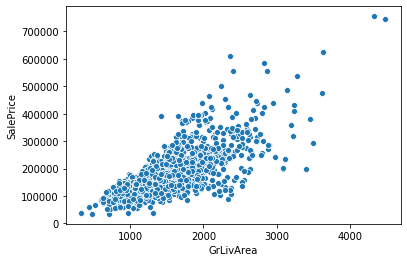

In [415]:
#Scatterplot of 'GrLivArea' against 'SalePrice' after Outlier Removal
sns.scatterplot(x="GrLivArea", y="SalePrice", data=train)

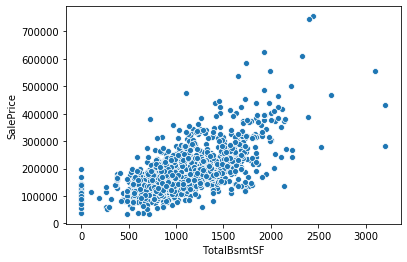

In [416]:
#Scatterplot of 'TotalBsmtSF' against 'SalePrice'
sns.scatterplot(x="TotalBsmtSF", y="SalePrice", data=train)

count     1458
mean    180933
std      79495
min      34900
25%     129925
50%     163000
75%     214000
max     755000
Name: SalePrice, dtype: float64

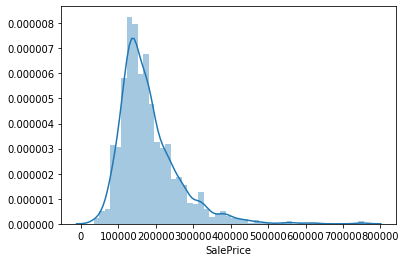

In [417]:
#Take a look at SalesPrice
train["SalePrice"].describe()

#Draw a histogram of SalesPrice
sns.distplot(train["SalePrice"])


((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74213.25959976624, 180932.91906721535, 0.9320154492892367))

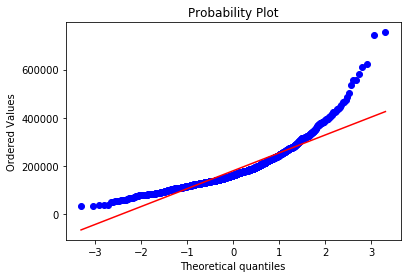

In [418]:
#Draw a QQ-plot of SalesPrice to see if is Normally Distributed
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

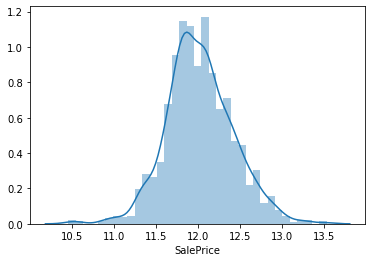

In [419]:
#In order to make SalesPrice less skewed and more normally distributed, perform a log transformation of SalesPrice
train["SalePrice"] = np.log1p(train["SalePrice"])

#Take a look at the Histogram after the Log Transformation
sns.distplot(train["SalePrice"])

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.3985294832980731, 12.024015155682548, 0.9953918721417083))

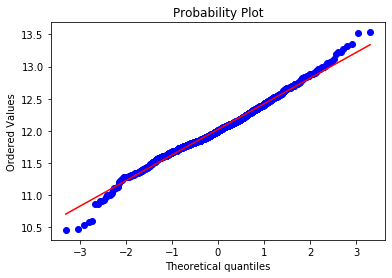

In [420]:
#Take a look at the QQ Plot after the Log Transformation

#Draw a QQ-plot of SalesPrice to see if is Normally Distributed
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [421]:
#Generate a Correlation Matrix to observe the linear relationship between variables.
train.corr()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
MSSubClass              1           -0       -0            0           -0   
LotFrontage            -0            1        0            0           -0   
LotArea                -0            0        1            0           -0   
OverallQual             0            0        0            1           -0   
OverallCond            -0           -0       -0           -0            1   
YearBuilt               0            0        0            1           -0   
YearRemodAdd            0            0        0            1            0   
MasVnrArea              0            0        0            0           -0   
BsmtFinSF1             -0            0        0            0           -0   
BsmtFinSF2             -0            0        0           -0            0   
BsmtUnfSF              -0            0       -0            0           -0   
TotalBsmtSF            -0            0        0            1           -0   
1stFlrSF               -0            0        0            0           -0   
2ndFlrSF                0            0        0            0            0   
LowQualFinSF            0            0        0           -0            0   
GrLivArea               0            0        0            1           -0   
BsmtFullBath            0            0        0            0           -0   
BsmtHalfBath           -0           -0        0           -0            0   
FullBath                0            0        0            1           -0   
HalfBath                0            0        0            0           -0   
BedroomAbvGr           -0            0        0            0            0   
KitchenAbvGr            0           -0       -0           -0           -0   
TotRmsAbvGrd            0            0        0            0           -0   
Fireplaces             -0            0        0            0           -0   
GarageYrBlt             0            0       -0            1           -0   
GarageCars             -0            0        0            1           -0   
GarageArea             -0            0        0            1           -0   
WoodDeckSF             -0            0        0            0           -0   
OpenPorchSF            -0            0        0            0           -0   
EnclosedPorch          -0            0       -0           -0            0   
3SsnPorch              -0            0        0            0            0   
ScreenPorch            -0            0        0            0            0   
PoolArea                0            0        0            0            0   
MiscVal                -0            0        0           -0            0   
MoSold                 -0            0        0            0           -0   
YrSold                 -0            0       -0           -0            0   
SalePrice              -0            0        0            1           -0   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass             0             0           0          -0          -0   
LotFrontage            0             0           0           0           0   
LotArea                0             0           0           0           0   
OverallQual            1             1           0           0          -0   
OverallCond           -0             0          -0          -0           0   
YearBuilt              1             1           0           0          -0   
YearRemodAdd           1             1           0           0          -0   
MasVnrArea             0             0           1           0          -0   
BsmtFinSF1             0             0           0           1          -0   
BsmtFinSF2            -0            -0          -0          -0           1   
BsmtUnfSF              0             0           0          -1          -0   
TotalBsmtSF            0             0           0           0           0   
1stFlrSF               0             0           0           0           0

(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x27518e91cc8>)

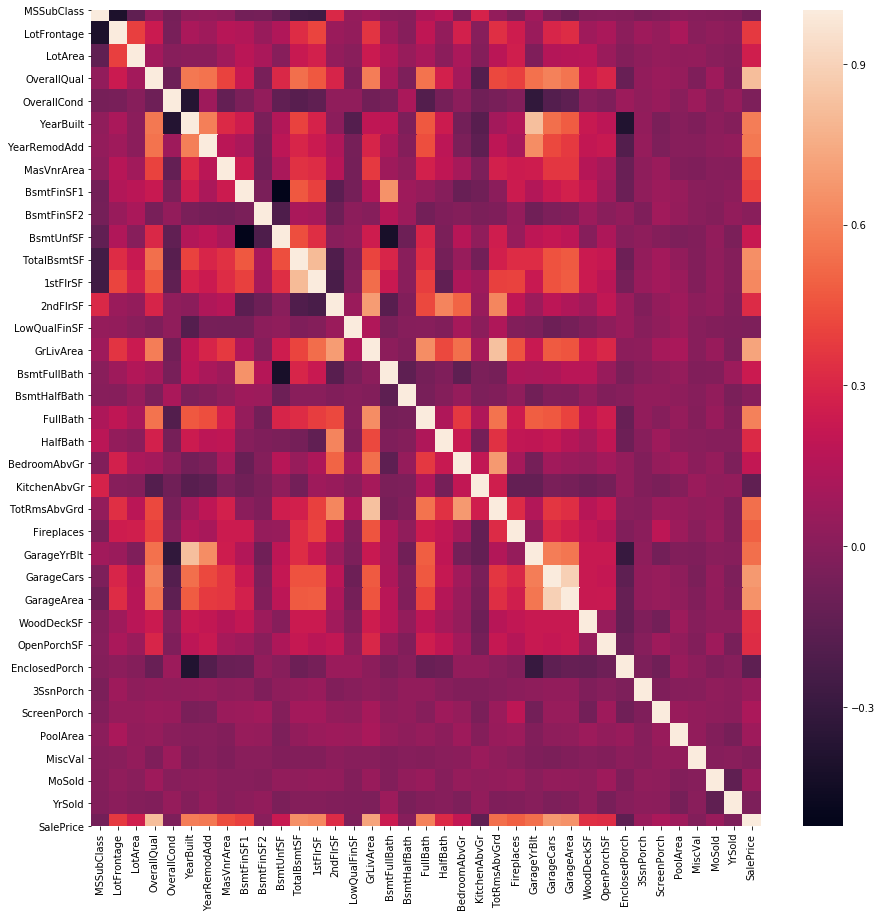

In [422]:
#Generate a HeatMap to observe the linear relationship between variables
plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr())

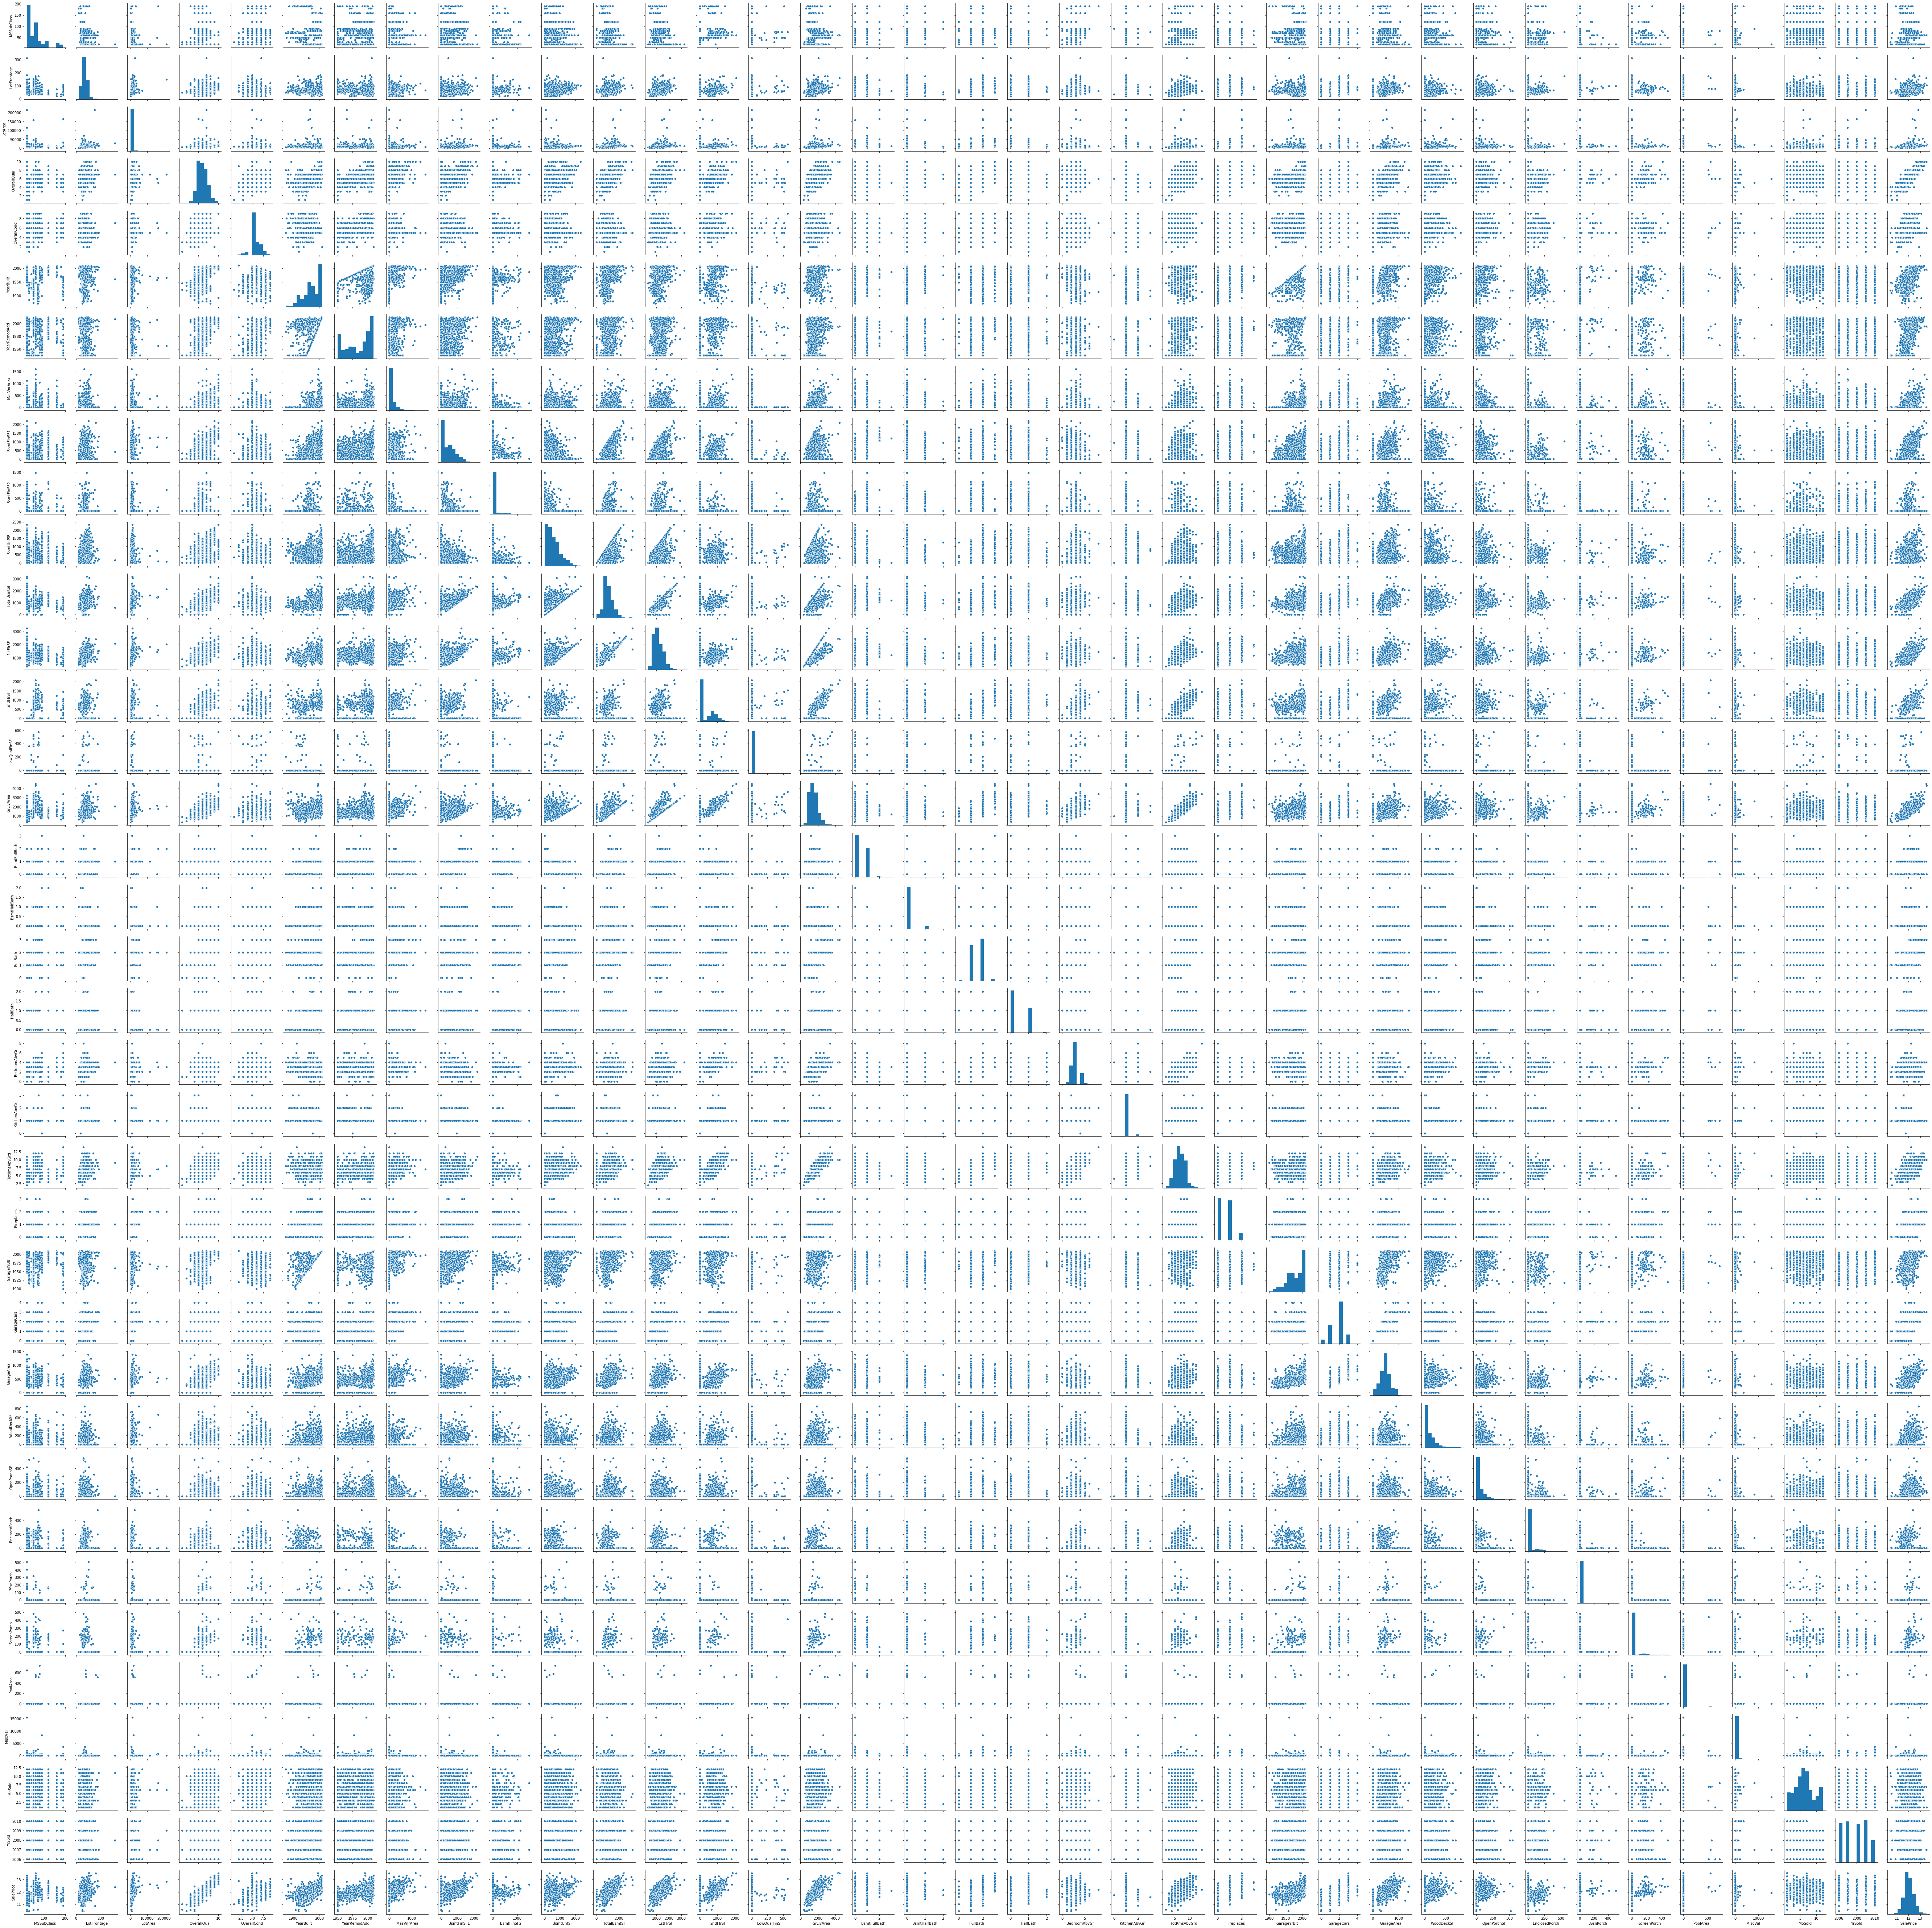

In [87]:
#Generate a scatterplot
sns.pairplot(train, height = 2)

In [423]:
#Concatenate the train and test sets for data preprocessing.
mf = pd.concat([train,test], sort=False)
mf.shape
mf.head()
mf.tail()

(2917, 80)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL           65     8450   Pave   NaN      Reg   
1          20       RL           80     9600   Pave   NaN      Reg   
2          60       RL           68    11250   Pave   NaN      IR1   
3          70       RL           60     9550   Pave   NaN      IR1   
4          60       RL           84    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         196        Gd        TA      PConc       Gd       TA           No   
1           0        TA        TA     CBlock       Gd       TA           Gd   
2         162        Gd        TA      PConc       Gd       TA           Mn   
3           0        TA        TA     BrkTil       TA       Gd           No   
4         350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1454         160       RM           21     1936   Pave   NaN      Reg   
1455         160       RM           21     1894   Pave   NaN      Reg   
1456          20       RL          160    20000   Pave   NaN      Reg   
1457          85       RL           62    10441   Pave   NaN      Reg   
1458          60       RL           74     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1454           0        TA        TA     CBlock       TA       TA   
1455           0        TA        TA     CBlock       TA       TA   
1456           0        TA        TA     CBlock       TA       TA   
1457           0        TA        TA      PConc       Gd       TA   
1458          94        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1454           No          Unf           0          Unf           0   
1455           No          Rec         252          Unf           0   
1456           No          ALQ        1224          Unf           0   
1457           Av          GLQ         337          Unf           0   
1458           Av          LwQ         758          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1454        546          546    GasA        Gd          Y      SBrkr   
1455        294          546    GasA        TA          Y      SBrkr   
1456          0         1224    GasA        Ex          Y      SBrkr   
1457        575          912    GasA        TA          Y      SBrkr   
1458        238          996    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1454       546       546             0       1092             0             0   
1455       546       546             0       1092             0             0   
1456      1224         0             0       1224             1             0   
1457       970         0             0        970             0             1   
1458       996      1004             0       2000             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1454         1         1             3             1          TA   
1455         1         1             3             1          TA   
1456         1         0             4             1          TA   
1457         1         0             3             1          TA   
1458         2         1             3             1          TA   

      TotRmsAbvGrd Functional  Firepl

In [424]:
#Determine which columns in the master file contain missing data
num_nulls = pd.DataFrame({"Number of Nulls":mf.isnull().sum()}) 
num_nulls[num_nulls["Number of Nulls"]!=0]

Number of Nulls
MSZoning                    4
LotFrontage               486
Alley                    2719
Utilities                   2
Exterior1st                 1
Exterior2nd                 1
MasVnrType                 24
MasVnrArea                 23
BsmtQual                   81
BsmtCond                   82
BsmtExposure               82
BsmtFinType1               79
BsmtFinSF1                  1
BsmtFinType2               80
BsmtFinSF2                  1
BsmtUnfSF                   1
TotalBsmtSF                 1
Electrical                  1
BsmtFullBath                2
BsmtHalfBath                2
KitchenQual                 1
Functional                  2
FireplaceQu              1420
GarageType                157
GarageYrBlt               159
GarageFinish              159
GarageCars                  1
GarageArea                  1
GarageQual                159
GarageCond                159
PoolQC                   2908
Fence                    2346
MiscFeature              2812
SaleType                    1
SalePrice                1459

In [425]:
#Impute the missing values for the columns above

#LotFrontage: Linear feet of street connected to property - Replace with mean
meanLotFrontage = int(mf["LotFrontage"].mean())
mf["LotFrontage"] = mf["LotFrontage"].fillna(meanLotFrontage)
print("Number of Null values:", mf["LotFrontage"].isnull().sum())

Number of Null values: 0


In [426]:
#Alley: Type of alley access to property
       #Grvl	Gravel
       #Pave	Paved
       #NA 	No alley access

mf["Alley"].value_counts()    
mf["Alley"] = mf["Alley"].fillna("No alley access")
mf["Alley"] = mf["Alley"].astype(str) #Change type to String
print("Number of Null values:", mf["Alley"].isnull().sum())
mf["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

Number of Null values: 0


No alley access    2719
Grvl                120
Pave                 78
Name: Alley, dtype: int64

In [427]:
#Utilities: Type of utilities available
       #AllPub	All public Utilities (E,G,W,& S)	
       #NoSewr	Electricity, Gas, and Water (Septic Tank)
       #NoSeWa	Electricity and Gas Only
       #ELO	Electricity only	

#Replace NA with AllPub because it is the most common value.
mf["Utilities"].value_counts()
mf["Utilities"] = mf["Utilities"].fillna("AllPub")
mf["Utilities"] = mf["Utilities"].astype(str) #Change type to String
print("Number of Null values:", mf["Utilities"].isnull().sum())
mf["Utilities"].value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

Number of Null values: 0


AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [428]:
#Exterior1st: Exterior covering on house
       #AsbShng	Asbestos Shingles
       #AsphShn	Asphalt Shingles
       #BrkComm	Brick Common
       #BrkFace	Brick Face
       #CBlock	Cinder Block
       #CemntBd	Cement Board
       #HdBoard	Hard Board
       #ImStucc	Imitation Stucco
       #MetalSd	Metal Siding
       #Other	Other
       #Plywood	Plywood
       #PreCast	PreCast	
       #Stone	Stone
       #Stucco	Stucco
       #VinylSd	Vinyl Siding
       #Wd Sdng	Wood Siding
       #WdShing	Wood Shingles
    

#Replace with the most common value
mf["Exterior1st"].value_counts()
mf["Exterior1st"] = mf["Exterior1st"].fillna("VinylSd")
mf["Exterior1st"] = mf["Exterior1st"].astype(str) #Change type to String
print("Number of Null values:", mf["Exterior1st"].isnull().sum())
mf["Exterior1st"].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     125
BrkFace      87
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

Number of Null values: 0


VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     125
BrkFace      87
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [429]:
#Exterior2nd: Exterior covering on house (if more than one material)
       #AsbShng	Asbestos Shingles
       #AsphShn	Asphalt Shingles
       #BrkComm	Brick Common
       #BrkFace	Brick Face
       #CBlock	Cinder Block
       #CemntBd	Cement Board
       #HdBoard	Hard Board
       #ImStucc	Imitation Stucco
       #MetalSd	Metal Siding
       #Other	Other
       #Plywood	Plywood
       #reCast	PreCast
       #Stone	Stone
       #Stucco	Stucco
       #VinylSd	Vinyl Siding
       #Wd Sdng	Wood Siding
       #WdShing	Wood Shingles


#Replace with the most common value
mf["Exterior2nd"].value_counts()
mf["Exterior2nd"] = mf["Exterior2nd"].fillna("VinylSd")
mf["Exterior2nd"] = mf["Exterior2nd"].astype(str) #Change type to String
print("Number of Null values:", mf["Exterior2nd"].isnull().sum())
mf["Exterior2nd"].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     125
Wd Shng      81
BrkFace      47
Stucco       46
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

Number of Null values: 0


VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     125
Wd Shng      81
BrkFace      47
Stucco       46
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [430]:
#MasVnrType: Masonry veneer type
       #BrkCmn	Brick Common
       #BrkFace	Brick Face
       #CBlock	Cinder Block
       #None	None
       #Stone	Stone



#This means no masonry veneer for the houses.Replace with None.
mf["MasVnrType"].value_counts()
mf["MasVnrType"] = mf["MasVnrType"].fillna("None")
print("Number of Null values:", mf["MasVnrType"].isnull().sum())
mf["MasVnrType"] = mf["MasVnrType"].astype(str) #Change type to String
mf["MasVnrType"].value_counts()

None       1742
BrkFace     879
Stone       247
BrkCmn       25
Name: MasVnrType, dtype: int64

Number of Null values: 0


None       1766
BrkFace     879
Stone       247
BrkCmn       25
Name: MasVnrType, dtype: int64

In [431]:
#MasVnrArea: Masonry veneer area in square feet

#This means no masonry veneer for these houses.Replace with 0.
mf["MasVnrArea"] = mf["MasVnrArea"].fillna(0)
print("Number of Null values:", mf["MasVnrArea"].isnull().sum())

Number of Null values: 0


In [432]:
#BsmtQual: Evaluates the height of the basement
       #Ex	Excellent (100+ inches)	
       #Gd	Good (90-99 inches)
       #TA	Typical (80-89 inches)
       #Fa	Fair (70-79 inches)
       #Po	Poor (<70 inches
       #NA	No Basement
        
#Replace with No Basement
mf["BsmtQual"].value_counts()
mf["BsmtQual"] = mf["BsmtQual"].fillna("No Basement")
mf["BsmtQual"] = mf["BsmtQual"].astype(str) #Change type to String
print("Number of Null values:", mf["BsmtQual"].isnull().sum())
mf["BsmtQual"].value_counts()

TA    1283
Gd    1209
Ex     256
Fa      88
Name: BsmtQual, dtype: int64

Number of Null values: 0


TA             1283
Gd             1209
Ex              256
Fa               88
No Basement      81
Name: BsmtQual, dtype: int64

In [433]:
#BsmtCond: Evaluates the general condition of the basement
       #Ex	Excellent
       #Gd	Good
       #TA	Typical - slight dampness allowed
       #Fa	Fair - dampness or some cracking or settling
       #Po	Poor - Severe cracking, settling, or wetness
       #NA	No Basement
        
#Replace with No Basement
mf["BsmtCond"].value_counts()
mf["BsmtCond"] = mf["BsmtCond"].fillna("No Basement")
mf["BsmtCond"] = mf["BsmtCond"].astype(str) #Change type to String
print("Number of Null values:", mf["BsmtCond"].isnull().sum())
mf["BsmtCond"].value_counts()

TA    2604
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

Number of Null values: 0


TA             2604
Gd              122
Fa              104
No Basement      82
Po                5
Name: BsmtCond, dtype: int64

In [434]:
#BsmtExposure: Refers to walkout or garden level walls
       #Gd	Good Exposure
       #Av	Average Exposure (split levels or foyers typically score average or above)	
       #Mn	Mimimum Exposure
       #No	No Exposure
       #NA	No Basement

#Replace with No Basement
mf["BsmtExposure"].value_counts()
mf["BsmtExposure"] = mf["BsmtExposure"].fillna("No Basement")
mf["BsmtExposure"] = mf["BsmtExposure"].astype(str) #Change type to String
print("Number of Null values:", mf["BsmtExposure"].isnull().sum())  
mf["BsmtExposure"].value_counts()

No    1904
Av     418
Gd     274
Mn     239
Name: BsmtExposure, dtype: int64

Number of Null values: 0


No             1904
Av              418
Gd              274
Mn              239
No Basement      82
Name: BsmtExposure, dtype: int64

In [435]:
#BsmtFinType1: Rating of basement finished area
       #GLQ	Good Living Quarters
       #ALQ	Average Living Quarters
       #BLQ	Below Average Living Quarters	
       #Rec	Average Rec Room
       #LwQ	Low Quality
       #Unf	Unfinshed
       #NA	No Basement

mf["BsmtFinType1"].value_counts()
mf["BsmtFinType1"] = mf["BsmtFinType1"].fillna("No Basement")
mf["BsmtFinType1"] = mf["BsmtFinType1"].astype(str) #Change type to String
print("Number of Null values:", mf["BsmtFinType1"].isnull().sum())    
mf["BsmtFinType1"].value_counts()

Unf    851
GLQ    847
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64

Number of Null values: 0


Unf            851
GLQ            847
ALQ            429
Rec            288
BLQ            269
LwQ            154
No Basement     79
Name: BsmtFinType1, dtype: int64

In [436]:
#BsmtFinType2: Rating of basement finished area (if multiple types)
       #GLQ	Good Living Quarters
       #ALQ	Average Living Quarters
       #BLQ	Below Average Living Quarters	
       #Rec	Average Rec Room
       #LwQ	Low Quality
       #Unf	Unfinshed
       #NA	No Basement

mf["BsmtFinType2"].value_counts()
mf["BsmtFinType2"] = mf["BsmtFinType2"].fillna("No Basement")
mf["BsmtFinType2"] = mf["BsmtFinType2"].astype(str) #Change type to String
print("Number of Null values:", mf["BsmtFinType2"].isnull().sum())    
mf["BsmtFinType2"].value_counts()

Unf    2491
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

Number of Null values: 0


Unf            2491
Rec             105
LwQ              87
No Basement      80
BLQ              68
ALQ              52
GLQ              34
Name: BsmtFinType2, dtype: int64

In [437]:
#BsmtFinSF1: Type 1 finished square feet

#Replace with 0
mf["BsmtFinSF1"] = mf["BsmtFinSF1"].fillna(0)
print("Number of Null values:", mf["BsmtFinSF1"].isnull().sum())    

Number of Null values: 0


In [438]:
#BsmtFinSF2: Type 2 finished square feet

#Replace with 0
mf["BsmtFinSF2"] = mf["BsmtFinSF2"].fillna(0)
print("Number of Null values:", mf["BsmtFinSF2"].isnull().sum())    

Number of Null values: 0


In [439]:
#BsmtUnfSF: Unfinished square feet of basement area

#Replace with 0
mf["BsmtUnfSF"] = mf["BsmtUnfSF"].fillna(0)
print("Number of Null values:", mf["BsmtUnfSF"].isnull().sum())    

Number of Null values: 0


In [440]:
#TotalBsmtSF: Total square feet of basement area

#Replace with 0
mf["TotalBsmtSF"] = mf["TotalBsmtSF"].fillna(0)
print("Number of Null values:", mf["TotalBsmtSF"].isnull().sum())    

Number of Null values: 0


In [441]:
#BsmtFullBath: Basement full bathrooms

#Replace with 0
mf["BsmtFullBath"] = mf["BsmtFullBath"].fillna(0)
print("Number of Null values:", mf["BsmtFullBath"].isnull().sum())    

Number of Null values: 0


In [442]:
#BsmtHalfBath: Basement half bathrooms
    
#Replace with 0
mf["BsmtHalfBath"] = mf["BsmtHalfBath"].fillna(0)
print("Number of Null values:", mf["BsmtHalfBath"].isnull().sum())    

Number of Null values: 0


In [443]:
#Electrical: Electrical system
       #SBrkr	Standard Circuit Breakers & Romex
       #FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       #FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       #FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       #Mix	Mixed

#Replace with the value that occurs the most
mf["Electrical"].value_counts()
mf["Electrical"] = mf["Electrical"].fillna("SBrkr")
print("Number of Null values:", mf["Electrical"].isnull().sum()) 
mf["Electrical"] = mf["Electrical"].astype(str) #Change type to String
mf["Electrical"].value_counts()

SBrkr    2669
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

Number of Null values: 0


SBrkr    2670
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [444]:
#KitchenQual: Kitchen quality
       #Ex	Excellent
       #Gd	Good
       #TA	Typical/Average
       #Fa	Fair
       #Po	Poor
    
#Replace with the value that occurs the most
mf["KitchenQual"].value_counts()
mf["KitchenQual"] = mf["KitchenQual"].fillna("TA")
print("Number of Null values:", mf["KitchenQual"].isnull().sum()) 
mf["KitchenQual"] = mf["KitchenQual"].astype(str) #Change type to String
mf["KitchenQual"].value_counts()

TA    1492
Gd    1151
Ex     203
Fa      70
Name: KitchenQual, dtype: int64

Number of Null values: 0


TA    1493
Gd    1151
Ex     203
Fa      70
Name: KitchenQual, dtype: int64

In [445]:
#Functional: Home functionality (Assume typical unless deductions are warranted)
       #Typ	Typical Functionality
       #Min1	Minor Deductions 1
       #Min2	Minor Deductions 2
       #Mod	Moderate Deductions
       #Maj1	Major Deductions 1
       #Maj2	Major Deductions 2
       #Sev	Severely Damaged
       #Sal	Salvage only

#Replace with the Type because Assume typical unless deductions are warranted
mf["Functional"].value_counts()
mf["Functional"] = mf["Functional"].fillna("Typ")
print("Number of Null values:", mf["Functional"].isnull().sum())  
mf["Functional"] = mf["Functional"].astype(str) #Change type to String
mf["Functional"].value_counts()

Typ     2715
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

Number of Null values: 0


Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [446]:
#FireplaceQu: Fireplace quality
       #Ex	Excellent - Exceptional Masonry Fireplace
       #Gd	Good - Masonry Fireplace in main level
       #TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       #Fa	Fair - Prefabricated Fireplace in basement
       #Po	Poor - Ben Franklin Stove
       #NA	No Fireplace

#Replace with No Fireplace
mf["FireplaceQu"].value_counts()
mf["FireplaceQu"] = mf["FireplaceQu"].fillna("No Fireplace")
print("Number of Null values:", mf["FireplaceQu"].isnull().sum())   
mf["FireplaceQu"] = mf["FireplaceQu"].astype(str) #Change type to String
mf["FireplaceQu"].value_counts()

Gd    742
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

Number of Null values: 0


No Fireplace    1420
Gd               742
TA               592
Fa                74
Po                46
Ex                43
Name: FireplaceQu, dtype: int64

In [447]:
#GarageType: Garage location
       #2Types	More than one type of garage
       #Attchd	Attached to home
       #Basment	Basement Garage
       #BuiltIn	Built-In (Garage part of house - typically has room above garage)
       #CarPort	Car Port
       #Detchd	Detached from home
       #NA	No Garage

#Replace with No Garage because NA is No Garage
mf["GarageType"].value_counts()
mf["GarageType"] = mf["GarageType"].fillna("No Garage")
print("Number of Null values:", mf["GarageType"].isnull().sum()) 
mf["GarageType"] = mf["GarageType"].astype(str) #Change type to String
mf["GarageType"].value_counts()

Attchd     1722
Detchd      779
BuiltIn     185
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

Number of Null values: 0


Attchd       1722
Detchd        779
BuiltIn       185
No Garage     157
Basment        36
2Types         23
CarPort        15
Name: GarageType, dtype: int64

In [448]:
#GarageFinish: Interior finish of the garage
       #Fin	Finished
       #RFn	Rough Finished	
       #Unf	Unfinished
       #NA	No Garage

#Replace with No Garage because NA is No Garage
mf["GarageFinish"].value_counts()
mf["GarageFinish"] = mf["GarageFinish"].fillna("No Garage")
print("Number of Null values:", mf["GarageFinish"].isnull().sum()) 
mf["GarageFinish"] = mf["GarageFinish"].astype(str) #Change type to String
mf["GarageFinish"].value_counts()

Unf    1230
RFn     811
Fin     717
Name: GarageFinish, dtype: int64

Number of Null values: 0


Unf          1230
RFn           811
Fin           717
No Garage     159
Name: GarageFinish, dtype: int64

In [449]:
#GarageQual: Garage quality
       #Ex	Excellent
       #Gd	Good
       #TA	Typical/Average
       #Fa	Fair
       #Po	Poor
       #NA	No Garage

#Replace with No Garage because NA is No Garage
mf["GarageQual"].value_counts()
mf["GarageQual"] = mf["GarageQual"].fillna("No Garage")
print("Number of Null values:", mf["GarageQual"].isnull().sum()) 
mf["GarageQual"] = mf["GarageQual"].astype(str) #Change type to String
mf["GarageQual"].value_counts()

TA    2602
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

Number of Null values: 0


TA           2602
No Garage     159
Fa            124
Gd             24
Po              5
Ex              3
Name: GarageQual, dtype: int64

In [450]:
#GarageCond: Garage condition
       #Ex	Excellent
       #Gd	Good
       #TA	Typical/Average
       #Fa	Fair
       #Po	Poor
       #NA	No Garage

#Replace with No Garage because NA is No Garage
mf["GarageCond"].value_counts()
mf["GarageCond"] = mf["GarageCond"].fillna("No Garage")
print("Number of Null values:", mf["GarageCond"].isnull().sum()) 
mf["GarageCond"] = mf["GarageCond"].astype(str) #Change type to String
mf["GarageCond"].value_counts()

TA    2652
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

Number of Null values: 0


TA           2652
No Garage     159
Fa             74
Gd             15
Po             14
Ex              3
Name: GarageCond, dtype: int64

In [451]:
#GarageYrBlt: Year garage was built

#If there is no Garage the year built is 0
mf["GarageYrBlt"] = mf["GarageYrBlt"].fillna(0)
print("Number of Null values:", mf["GarageYrBlt"].isnull().sum())    

Number of Null values: 0


In [452]:
#GarageCars: Size of garage in car capacity

#If there is no Garage then number of garage cars is 0
mf["GarageCars"] = mf["GarageCars"].fillna(0)
print("Number of Null values:", mf["GarageCars"].isnull().sum())    

Number of Null values: 0


In [453]:
#GarageArea: Size of garage in square feet

#If there is no garage then Garage Area is 0
mf["GarageArea"] = mf["GarageArea"].fillna(0)
print("Number of Null values:", mf["GarageArea"].isnull().sum())    

Number of Null values: 0


In [454]:
#PoolQC: Pool quality
       #Ex	Excellent
       #Gd	Good
       #TA	Average/Typical
       #Fa	Fair
       #NA	No Pool

#Replace with No pool because most houses have not pools
mf["PoolQC"].value_counts()
mf["PoolQC"] = mf["PoolQC"].fillna("No Pool")
print("Number of Null values:", mf["PoolQC"].isnull().sum()) 
mf["PoolQC"] = mf["PoolQC"].astype(str) #Change type to String
mf["PoolQC"].value_counts()

Ex    4
Gd    3
Fa    2
Name: PoolQC, dtype: int64

Number of Null values: 0


No Pool    2908
Ex            4
Gd            3
Fa            2
Name: PoolQC, dtype: int64

In [455]:
#Fence: Fence quality
       #GdPrv	Good Privacy
       #MnPrv	Minimum Privacy
       #GdWo	Good Wood
       #MnWw	Minimum Wood/Wire
       #NA	No Fence

#Replace with No Fence
mf["Fence"].value_counts()
mf["Fence"] = mf["Fence"].fillna("No Fence")
print("Number of Null values:", mf["Fence"].isnull().sum()) 
mf["Fence"] = mf["Fence"].astype(str) #Change type to String
mf["Fence"].value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

Number of Null values: 0


No Fence    2346
MnPrv        329
GdPrv        118
GdWo         112
MnWw          12
Name: Fence, dtype: int64

In [456]:
#MiscFeature: Miscellaneous feature not covered in other categories
       #Elev	Elevator
       #Gar2	2nd Garage (if not described in garage section)
       #Othr	Other
       #Shed	Shed (over 100 SF)
       #TenC	Tennis Court
       #NA	None
        
#Replace with None
mf["MiscFeature"].value_counts()
mf["MiscFeature"] = mf["MiscFeature"].fillna("None")
print("Number of Null values:", mf["MiscFeature"].isnull().sum())    
mf["MiscFeature"] = mf["MiscFeature"].astype(str) #Change type to String
mf["MiscFeature"].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

Number of Null values: 0


None    2812
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [457]:
#SaleType: Type of sale
       #3WD 	Warranty Deed - Conventional
       #CWD	Warranty Deed - Cash
       #VWD	Warranty Deed - VA Loan
       #New	Home just constructed and sold
       #COD	Court Officer Deed/Estate
       #Con	Contract 15% Down payment regular terms
       #ConLw	Contract Low Down payment and low interest
       #ConLI	Contract Low Interest
       #ConLD	Contract Low Down
       #Oth	Other

#Replace with the value that occurs the most
mf["SaleType"].value_counts()
mf["SaleType"] = mf["SaleType"].fillna("WD")
print("Number of Null values:", mf["SaleType"].isnull().sum())   
mf["SaleType"] = mf["SaleType"].astype(str) #Change type to String
mf["SaleType"].value_counts()

WD       2525
New       237
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

Number of Null values: 0


WD       2526
New       237
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [458]:
#Feature Engineering

#Total Square Footage
#Create a variable that sums the Square Footage of the Basement, 1st Floor and 2nd Floor
mf['TotalSF'] = mf['TotalBsmtSF'] + mf['1stFlrSF'] + mf['2ndFlrSF']
mf[['TotalBsmtSF','1stFlrSF','2ndFlrSF','TotalSF']]

TotalBsmtSF  1stFlrSF  2ndFlrSF  TotalSF
0             856       856       854     2566
1            1262      1262         0     2524
2             920       920       866     2706
3             756       961       756     2473
4            1145      1145      1053     3343
...           ...       ...       ...      ...
1454          546       546       546     1638
1455          546       546       546     1638
1456         1224      1224         0     2448
1457          912       970         0     1882
1458          996       996      1004     2996

[2917 rows x 4 columns]

In [459]:
#Investigate the type of these columns.
mf[['MSSubClass',"OverallQual",'OverallCond','YrSold','MoSold',"GarageYrBlt","YearBuilt","YearRemodAdd"]].dtypes

#Change the types to ensure that the categorical variables are infact categorical
mf["MSSubClass"] = mf["MSSubClass"].apply(str)
mf["OverallQual"] = mf["OverallQual"].apply(str)
mf["OverallCond"] = mf["OverallCond"].apply(str)
mf["YrSold"] = mf["YrSold"].apply(str)
mf["MoSold"] = mf["MoSold"].apply(str)
mf['GarageYrBlt'] = mf['GarageYrBlt'].values.astype(np.int64)
mf["GarageYrBlt"] = mf["GarageYrBlt"].apply(str)
mf["YearBuilt"] = mf["YearBuilt"].apply(str)
mf["YearRemodAdd"] = mf["YearRemodAdd"].apply(str)

#Investigate the type of these columns after conversion
mf[['MSSubClass',"OverallQual",'OverallCond','YrSold','MoSold',"GarageYrBlt","YearBuilt","YearRemodAdd"]].dtypes



MSSubClass        int64
OverallQual       int64
OverallCond       int64
YrSold            int64
MoSold            int64
GarageYrBlt     float64
YearBuilt         int64
YearRemodAdd      int64
dtype: object

MSSubClass      object
OverallQual     object
OverallCond     object
YrSold          object
MoSold          object
GarageYrBlt     object
YearBuilt       object
YearRemodAdd    object
dtype: object

In [460]:
#Box-Cox Transformations for skewness and outlier reduction in numerical variables

#Get all the numerical features
#numeric_cols = mf.dtypes[mf.dtypes != "object"].index
numeric_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
                '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',  'GarageCars', 'GarageArea', 'WoodDeckSF', 
                'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'TotalSF']

#Determine the skewness of each numerical feature
for col in numeric_cols:
    print("Skewness of "  + col + " : " + str(mf[col].skew()))
    
#Get the list of skewness above 0.75
skewness = mf[numeric_cols].skew()
#skewness
skewness_list = skewness[skewness > 0.75].index
#skewness_list

#Apply Box-Cox Transformations to fixed any skewness above 0.75
for skew_col in skewness_list:
    mf[skew_col] = boxcox1p(mf[skew_col], 0.15)

Skewness of LotFrontage : 1.233258433869367
Skewness of LotArea : 13.116240381085582
Skewness of MasVnrArea : 2.6230683465481532
Skewness of BsmtFinSF1 : 0.981149194818779
Skewness of BsmtFinSF2 : 4.146635976494419
Skewness of BsmtUnfSF : 0.9201614522844864
Skewness of TotalBsmtSF : 0.6720970564192298
Skewness of 1stFlrSF : 1.2579329323447708
Skewness of 2ndFlrSF : 0.8619988496452764
Skewness of LowQualFinSF : 12.090757076763417
Skewness of GrLivArea : 1.06930033142033
Skewness of BsmtFullBath : 0.6227350310732301
Skewness of BsmtHalfBath : 3.9320182078879196
Skewness of FullBath : 0.16559942383702825
Skewness of HalfBath : 0.6970244365965833
Skewness of BedroomAbvGr : 0.32673631248194557
Skewness of KitchenAbvGr : 4.3027630269165
Skewness of TotRmsAbvGrd : 0.7496176182552688
Skewness of Fireplaces : 0.7256511193144619
Skewness of GarageCars : -0.21941006983560973
Skewness of GarageArea : 0.21696847677690778
Skewness of WoodDeckSF : 1.8457408931172405
Skewness of OpenPorchSF : 2.530659

In [461]:
#Observe the adjusted skewness
for col in skewness_list:
    print("Skewness of "  + col + " : " + str(mf[col].skew()))


Skewness of LotFrontage : -0.776854921181797
Skewness of LotArea : 0.17782643026379838
Skewness of MasVnrArea : 0.637715758328015
Skewness of BsmtFinSF1 : -0.48911734645295246
Skewness of BsmtFinSF2 : 2.5645541692317546
Skewness of BsmtUnfSF : -1.538077401392622
Skewness of 1stFlrSF : 0.1792096530017686
Skewness of 2ndFlrSF : 0.3290477963605567
Skewness of LowQualFinSF : 8.745528066314867
Skewness of GrLivArea : 0.13011792667440875
Skewness of BsmtHalfBath : 3.788633732823762
Skewness of KitchenAbvGr : 3.699205521217903
Skewness of WoodDeckSF : 0.22429679891716595
Skewness of OpenPorchSF : 0.09943245372118246
Skewness of EnclosedPorch : 2.0253629947439395
Skewness of 3SsnPorch : 8.926240617568633
Skewness of ScreenPorch : 2.9785840953325677
Skewness of PoolArea : 15.767637860352663
Skewness of MiscVal : 5.597842049263943
Skewness of TotalSF : -0.20811028026664186


In [462]:
#Label Encoding

#Encode target labels with value between 0 and n_classes-1.
#LabelEncoder can be used to normalize labels.
#It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

label_encoder_list = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition']

for var in label_encoder_list:
    LE = LabelEncoder() 
    mf[var] = LE.fit(list(mf[var].values)).transform(list(mf[var].values))
    
    
#Investigate the changes
mf[label_encoder_list]

MSSubClass  MSZoning  Street  Alley  LotShape  LandContour  Utilities  \
0             10         3       1      1         3            3          0   
1              5         3       1      1         3            3          0   
2             10         3       1      1         0            3          0   
3             11         3       1      1         0            3          0   
4             10         3       1      1         0            3          0   
...          ...       ...     ...    ...       ...          ...        ...   
1454           2         4       1      1         3            3          0   
1455           2         4       1      1         3            3          0   
1456           5         3       1      1         3            3          0   
1457          14         3       1      1         3            3          0   
1458          10         3       1      1         3            3          0   

      LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0             4          0             5           2           2         0   
1             2          0            24           1           2         0   
2             4          0             5           2           2         0   
3             0          0             6           2           2         0   
4             2          0            15           2           2         0   
...         ...        ...           ...         ...         ...       ...   
1454          4          0            10           2           2         3   
1455          4          0            10           2           2         4   
1456          4          0            11           2           2         0   
1457          4          0            11           2           2         0   
1458          4          1            11           2           2         0   

      HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0              5            7            4        110            53   
1              2            6            7         83            26   
2              5            7            4        108            52   
3              5            7            4         25            20   
4              5            8            4        107            50   
...          ...          ...          ...        ...           ...   
1454           5            4            6         77            20   
1455           5            4            4         77            20   
1456           2            5            6         67            46   
1457           6            5            4         99            42   
1458           5            7            4        100            44   

      RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  ExterQual  \
0             1         0           12           13           1          2   
1             1         0            8            8           2          3   
2             1         0           12           13           1          2   
3             1         0           13           15           2          3   
4             1         0           12           13           1          2   
...         ...       ...          ...          ...         ...        ...   
1454          1         0            5            5           2          3   
1455          1         0            5            5           2          3   
1456          1         0           12           13           2          3   
1457          1         0            6           15           2          3   
1458          1         0            6            6           1          3   

      ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0             4           2         2         4             3             2   
1             4           1         2         4             1             0   
2             4           2         2         4             2             2   
3             

In [463]:
#Create dummy variables for each categorical variable
mf = pd.get_dummies(data=mf, columns = label_encoder_list, drop_first=True)
mf.shape
mf.columns
mf.head()

(2917, 478)

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_4', 'SaleType_5', 'SaleType_6', 'SaleType_7', 'SaleType_8',
       'SaleCondition_1', 'SaleCondition_2', 'SaleCondition_3',
       'SaleCondition_4', 'SaleCondition_5'],
      dtype='object', length=478)

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0            6       19           8          11           0          7   
1            6       20           0          12           0          9   
2            6       20           8          10           0         10   
3            6       20           0           8           0         10   
4            6       21           9          11           0         10   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0          856        12        12             0         14             1   
1         1262        13         0             0         13             0   
2          920        12        12             0         14             1   
3          756        12        11             0         14             1   
4         1145        13        12             0         14             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0           0        2003           2         548           0            6   
1           1        1976           2         460           9            0   
2           1        2001           2         608           0            5   
3           1        1998           3         642           0            5   
4           1        2000           3         836           8            6   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  \
0              0          0            0         0        0         12   
1              0          0            0         0        0         12   
2              0          0            0         0        0         12   
3              9          0            0         0        0         12   
4              0          0            0         0        0         12   

   TotalSF  MSSubClass_1  MSSubClass_2  MSSubClass_3  MSSubClass_4  \
0       15             0             0             0             0   
1       15             0             0             0             0   
2       15             0             0             0             0   
3       15             0             0             0             0   
4       16             0             0             0             0   

   MSSubClass_5  MSSubClass_6  MSSubClass_7  MSSubClass_8  MSSubClass_9  \
0             0             0             0             0             0   
1             1             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   MSSubClass_10  MSSubClass_11  MSSubClass_12  MSSubClass_13  MSSubClass_14  \
0              1              0              0              0              0   
1              0              0              0              0              0   
2              1              0              0              0              0   
3              0              1              0              0              0   
4              1              0              0              0              0   

   MSSubClass_15  MSZoning_1  MSZoning_2  MSZoning_3  MSZoning_4  MSZoning_5  \
0              0           0           0           1           0           0   
1              0           0           0           1           0           0   
2              0           0           0           1           0           0   
3              0     

In [464]:
#Separate the master file into train and test set.
train_df = mf[0:1458]
test_df = mf[1458:]


#The train set X varaibles
train_X = train_df.drop(columns = ["SalePrice"])

#SalePrice is the Y variable in the train set
train_Y =  train_df.loc[:,['SalePrice']]

#Drop the SalePrice column from test
test_df = test_df.drop(columns = ["SalePrice"])


In [465]:
#Model Preparation
regression_models = []
regression_models.append(("Linear Regression", LinearRegression()))
regression_models.append(("Ridge Regression", Ridge()))
regression_models.append(("Lasso Regression", Lasso(alpha =0.0005)))
regression_models.append(("LassoCV Regression", LassoCV()))
regression_models.append(("ElasticNet Regression", ElasticNet(alpha=0.0005, l1_ratio=.9)))
regression_models.append(("BayesianRidge Regression", BayesianRidge()))
regression_models.append(("LassoLarsIC Regression", LassoLarsIC()))
regression_models.append(("Random Forest Regressor", RandomForestRegressor()))
regression_models.append(("KNeighbors Regressor", KNeighborsRegressor()))
regression_models.append(("DecisionTree Regressor", DecisionTreeRegressor()))
regression_models.append(("Support Vector Regressor", SVR()))
regression_models.append(("KernelRidge Regression", KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)))

scoring = "neg_mean_squared_error"
# 10-Fold split 
for name, model in regression_models:
    kFold = KFold(n_splits = 10, random_state = 25)
    rmse = np.sqrt(-cross_val_score(model, train_X, train_Y, cv = kFold, scoring = scoring))
    print(name, "RSME: ", rmse.mean())

Linear Regression RSME:  0.13744792632849584
Ridge Regression RSME:  0.11968386317929729
Lasso Regression RSME:  0.11406870103150626
LassoCV Regression RSME:  0.2153584132648109
ElasticNet Regression RSME:  0.11400367866869539
BayesianRidge Regression RSME:  0.11563909858880403
LassoLarsIC Regression RSME:  0.13717206614410224
Random Forest Regressor RSME:  0.1508024244835176
KNeighbors Regressor RSME:  0.2536698705206916
DecisionTree Regressor RSME:  0.21134002500757104
Support Vector Regressor RSME:  0.3258616359264908
KernelRidge Regression RSME:  0.19203189967702167


In [476]:
#Model Preparation
regression_models = []
regression_models.append(("Linear Regression",make_pipeline(SelectKBest(k=20),LinearRegression())))
regression_models.append(("Ridge Regression", make_pipeline(SelectKBest(k=20),Ridge())))
regression_models.append(("Lasso Regression", make_pipeline(SelectKBest(k=20),Lasso(alpha =0.0005))))
regression_models.append(("LassoCV Regression", make_pipeline(SelectKBest(k=20),LassoCV())))
regression_models.append(("ElasticNet Regression", make_pipeline(SelectKBest(k=20),ElasticNet(alpha=0.0005, l1_ratio=.9))))
regression_models.append(("BayesianRidge Regression", make_pipeline(SelectKBest(k=20),BayesianRidge())))
regression_models.append(("LassoLarsIC Regression", make_pipeline(SelectKBest(k=20),LassoLarsIC())))
regression_models.append(("Random Forest Regressor", make_pipeline(SelectKBest(k=20),RandomForestRegressor())))
regression_models.append(("KNeighbors Regressor", make_pipeline(SelectKBest(k=20),KNeighborsRegressor())))
regression_models.append(("DecisionTree Regressor", make_pipeline(SelectKBest(k=20),DecisionTreeRegressor())))
regression_models.append(("Support Vector Regressor", make_pipeline(SelectKBest(k=20),SVR())))
regression_models.append(("KernelRidge Regression", make_pipeline(SelectKBest(k=20),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5))))

scoring = "neg_mean_squared_error"
# 10-Fold split 
for name, model in regression_models:
    kFold = KFold(n_splits = 10, random_state = 25)
    rmse = np.sqrt(-cross_val_score(model, train_X, train_Y, cv = kFold, scoring = scoring))
    print(name, "RSME: ", rmse.mean())

Linear Regression RSME:  0.22089185795208904
Ridge Regression RSME:  0.22055082344078797
Lasso Regression RSME:  0.22050669042441512
LassoCV Regression RSME:  0.22033075066098906
ElasticNet Regression RSME:  0.22045109923979714
BayesianRidge Regression RSME:  0.22053758175703314
LassoLarsIC Regression RSME:  0.22216204358285557
Random Forest Regressor RSME:  0.2491839473625687
KNeighbors Regressor RSME:  0.23625434712874296
DecisionTree Regressor RSME:  0.27767303612331234
Support Vector Regressor RSME:  0.2215580665267381
KernelRidge Regression RSME:  0.22241413088221038


In [467]:
#Train and Predict - Polynomial Ridge Regression
estimator = Pipeline([("Polynomial Features", PolynomialFeatures(2)),("Ridge Regression", Ridge())]).fit(train_X, train_Y)
estimator.score(train_X, train_Y)
predict_results_Polynomial_Ridge = estimator.predict(test_df.values)

#Create a dataframe output of the predictions
final_submission = pd.DataFrame()
final_submission['Id'] = testID
final_submission['SalePrice'] = np.expm1(predict_results_Polynomial_Ridge)
final_submission.to_csv("C:/Users/Vanessa/Queens - MMA/MMA 867 - Predictive Modelling/Assignment 1 - Individual/Final Submission - Polynomial Ridge.csv", index=False)

0.9999978478106074

In [477]:
#Train and Predict - SelectKBest ElasticNet Regression
estimator = Pipeline([("SelectKBest", SelectKBest(k=20)),("ElasticNet Regression", ElasticNet(alpha=0.0005, l1_ratio=.9))]).fit(train_X, train_Y)
estimator.score(train_X, train_Y)
predict_results_SelectKBest_ElasticNet = estimator.predict(test_df.values)

#Create a dataframe output of the predictions
final_submission = pd.DataFrame()
final_submission['Id'] = testID
final_submission['SalePrice'] = np.expm1(predict_results_SelectKBest_ElasticNet)
final_submission.to_csv("C:/Users/Vanessa/Queens - MMA/MMA 867 - Predictive Modelling/Assignment 1 - Individual/Final Submission - SelectKBest ElasticNet.csv", index=False)

0.7249135664469277

In [ ]:
#Train and Predict - Polynomial ElasticNet Regression
estimator = Pipeline([("Polynomial Features", PolynomialFeatures(2)),("ElasticNet Regression", ElasticNet(alpha=0.0005, l1_ratio=.9))]).fit(train_X, train_Y)
estimator.score(train_X, train_Y)
predict_results_Polynomial_ElasticNet = estimator.predict(test_df.values)

#Create a dataframe output of the predictions
final_submission = pd.DataFrame()
final_submission['Id'] = testID
final_submission['SalePrice'] = np.expm1(predict_results_Polynomial_ElasticNet)
final_submission.to_csv("C:/Users/Vanessa/Queens - MMA/MMA 867 - Predictive Modelling/Assignment 1 - Individual/Final Submission - Polynomial ElasticNet.csv", index=False)

In [74]:
#Train and Predict - Ridge Regression
Ridge_Regression = Ridge().fit(train_X, train_Y)
Ridge_Regression.score(train_X, train_Y)
predict_results_Ridge = Ridge_Regression.predict(test_df.values)

#Create a dataframe output of the predictions
final_submission = pd.DataFrame()
final_submission['Id'] = testID
final_submission['SalePrice'] = np.expm1(predict_results_Ridge)
final_submission.to_csv("C:/Users/Vanessa/Queens - MMA/MMA 867 - Predictive Modelling/Assignment 1 - Individual/Final Submission - Ridge.csv", index=False)

0.9168706150446806

In [75]:
#Train and Predict - BayesianRidge Regression
BayesianRidge_Regression = BayesianRidge().fit(train_X, train_Y)
BayesianRidge_Regression.score(train_X, train_Y)
predict_results_BayesianRidge = BayesianRidge_Regression.predict(test_df.values)

#Create a dataframe output of the predictions
final_submission = pd.DataFrame()
final_submission['Id'] = testID
final_submission['SalePrice'] = np.expm1(predict_results_Ridge)
final_submission.to_csv("C:/Users/Vanessa/Queens - MMA/MMA 867 - Predictive Modelling/Assignment 1 - Individual/Final Submission - BayesianRidge.csv", index=False)

0.9137116215536654

In [469]:
#Train and Predict - ElasticNet Regression
ElasticNet_Regression = ElasticNet().fit(train_X, train_Y)
ElasticNet_Regression.score(train_X, train_Y)
predict_results_ElasticNet = ElasticNet_Regression.predict(test_df.values)

#Create a dataframe output of the predictions
final_submission = pd.DataFrame()
final_submission['Id'] = testID
final_submission['SalePrice'] = np.expm1(predict_results_ElasticNet)
final_submission.to_csv("C:/Users/Vanessa/Queens - MMA/MMA 867 - Predictive Modelling/Assignment 1 - Individual/Final Submission - ElasticNet.csv", index=False)

0.6353405838741112

In [76]:
#Train and Predict - Bagging Regressor using Ridge Regression

BaggingRegressor_Ridge = BaggingRegressor(base_estimator=Ridge(), n_estimators=10, random_state=0).fit(train_X, train_Y)
BaggingRegressor_Ridge.score(train_X, train_Y)
predict_results_BaggingRegressor_Ridge = BaggingRegressor_Ridge.predict(test_df.values)

#Create a dataframe output of the predictions
final_submission = pd.DataFrame()
final_submission['Id'] = testID
final_submission['SalePrice'] = np.expm1(predict_results_BaggingRegressor_Ridge)
final_submission.to_csv("C:/Users/Vanessa/Queens - MMA/MMA 867 - Predictive Modelling/Assignment 1 - Individual/Final Submission - BaggingRegressor_Ridge.csv", index=False)

0.9158952072308997

In [714]:
#Train and Predict - Voting Regressor
Voting_Regressor = VotingRegressor(regression_models)
Voting_Regressor.fit(train_X, train_Y)
#Voting_Regressor.score(train_X, np.hstack(train_Y.values))
predict_results_VotingRegressor = Voting_Regressor.predict(test_df.values)

#Create a dataframe output of the predictions
final_submission = pd.DataFrame()
final_submission['Id'] = testID
final_submission['SalePrice'] = np.expm1(predict_results_VotingRegressor)
final_submission.to_csv("C:/Users/Vanessa/Queens - MMA/MMA 867 - Predictive Modelling/Assignment 1 - Individual/Final Submission - VotingRegressor.csv", index=False)

VotingRegressor(estimators=[('Linear Regression',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('Ridge Regression',
                             Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001)),
                            ('Lasso Regression',
                             Lasso(alpha=0.0005, copy_X=True,
                                   fit_intercept=True, max_iter=1000,
                                   n...
                                                   random_state=None,
                                                   splitter='best')),
                            ('Support Vector Regressor',
                             SVR(C=1.0, cache_size=200, coef0=0

ValueError: could not broadcast input array from shape (1459,1) into shape (1459)

In [ ]:
#EXTRA CODE


#MSSubClass: Identifies the type of dwelling involved in the sale.

#Determine if there are any missing values - NO MISSING VALUES TRAIN
train["MSSubClass"].dtypes
train["MSSubClass"].value_counts()
train["MSSubClass"].isna().value_counts()
train["MSSubClass"].isnull().value_counts()

#Determine if there are any missing values - NO MISSING VALUES TEST
test["MSSubClass"].dtypes
test["MSSubClass"].value_counts()
test["MSSubClass"].isna().value_counts()
test["MSSubClass"].isnull().value_counts()

#MSZoning: Identifies the general zoning classification of the sale.

#Determine if there are any missing values 

#Change type to string
print("Train")
#train["MSZoning"].dtypes
train["MSZoning"] = train["MSZoning"].astype(str)
train["MSZoning"].value_counts()
train["MSZoning"].isna().value_counts()
train["MSZoning"].isnull().value_counts()

#Determine if there are any missing values
print("Test")
#test["MSZoning"].dtypes
test["MSZoning"] = test["MSZoning"].astype(str)
test["MSZoning"].value_counts()
test["MSZoning"].isna().value_counts()
test["MSZoning"].isnull().value_counts()


#Rearrange the columns
train_df = train_df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
                       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
                       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
                       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
                       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
                       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
                       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
                       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
                       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
                       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
                       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
                       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'TotalSF','SalePrice']]

#Get the X and Y variables of the train 
train_X = train_df.loc[:,['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
                       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
                       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
                       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
                       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
                       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
                       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
                       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
                       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
                       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
                       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
                       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'TotalSF']]


#Model Preparation
LinearRegression = Pipeline([("Polynomial Features", PolynomialFeatures(2)),("Linear Regression", LinearRegression())])
RidgeRegression = Pipeline([("Polynomial Features", PolynomialFeatures(2)),("Ridge Regression", Ridge(alpha=0.5))])
LassoRegression = Pipeline([("Polynomial Features", PolynomialFeatures(2)),("Lasso Regression", Lasso(alpha=1, tol=1e-2, max_iter=1e7))])
LassoCVRegression = Pipeline([("Polynomial Features", PolynomialFeatures(2)),("LassoCV Regression", LassoCV(alphas=[0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 150.0, 200.0, 250.0, 500.0], max_iter=1e7, tol=1e-2))])
ElasticNet = Pipeline([("Polynomial Features", PolynomialFeatures(2)),("ElasticNet Regression", ElasticNet(alpha=0.0005, l1_ratio=.9))])
BayesianRidgeRegression = Pipeline([("Polynomial Features", PolynomialFeatures(2)),("BayesianRidge Regression", BayesianRidge())])
LassoLarsICRegression = Pipeline([("Polynomial Features", PolynomialFeatures(2)),("LassoLarsIC Regression", LassoLarsIC())])
RandomForestRegression = Pipeline([("Polynomial Features", PolynomialFeatures(2)),("Random Forest Regressor", LassoLarsIC())])
KNeighborsRegression = Pipeline([("Polynomial Features", PolynomialFeatures(2)),("KNeighbors Regressor", KNeighborsRegressor())])
DecisionTreeRegression = Pipeline([("Polynomial Features", PolynomialFeatures(2)),("DecisionTree Regressor", DecisionTreeRegressor())])
SVRRegression = Pipeline([("Polynomial Features", PolynomialFeatures(2)),("Support Vector Regressor", SVR())])
KernelRidgeLinearRegression = Pipeline([("Polynomial Features", PolynomialFeatures(2)),("KernelRidge Regression", KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5))])

regression_models = [LinearRegression,
                     RidgeRegression,
                     LassoRegression,
                     LassoCVRegression,
                     ElasticNet,
                     BayesianRidgeRegression,
                     LassoLarsICRegression,
                     RandomForestRegression,
                     KNeighborsRegression,
                     DecisionTreeRegression,
                     SVRRegression,
                     KernelRidgeLinearRegression]

scoring = "neg_mean_squared_error"
# 10-Fold split 
for name, model in regression_models:
    kFold = KFold(n_splits = 10, random_state = 25)
    rmse = np.sqrt(-cross_val_score(model, train_X, train_Y, cv = kFold, scoring = scoring))
    print(name, "RSME: ", rmse.mean())
